In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [135]:
data = pd.read_csv('mess/2D.csv', sep ='\t')
data.head()

0.0      0.0.1       -0.0      0.0.2
0  16.178  22.448677  43.563890  20.298927
1  16.199  22.894623  43.359848  20.686054
2  16.221  23.486000  43.057087  21.208532
3  16.241  24.327982  42.606754  22.118584
4  16.261  25.028069  42.209038  22.805996

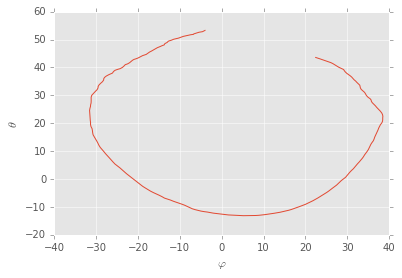

In [136]:
x = data['0.0.1']
y = data['-0.0']

plt.plot(x,y)
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\theta$')

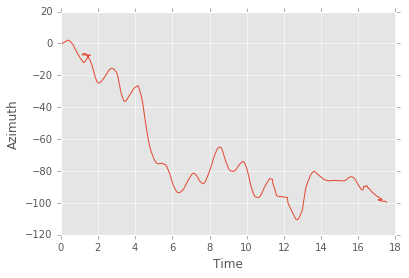

In [6]:
plt.plot(data['0.0'],data['0.0.1'])
plt.xlabel('Time')
plt.ylabel('Azimuth')

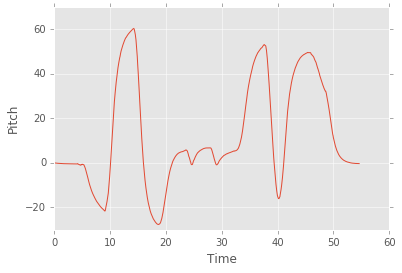

In [673]:
plt.plot(data['0.0'],data['-0.0'])
plt.xlabel('Time')
plt.ylabel('Pitch')

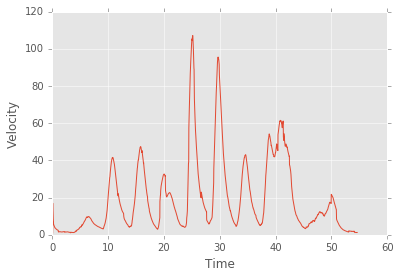

In [674]:
plt.plot(data['0.0'],data['0.0.2'])
plt.xlabel('Time')
plt.ylabel('Velocity')

In [300]:
a = data['0.0.2']
g = 0
for i in range(0,len(a)-100):
    g = g + a[i]
g = g/(len(a)-100)
g

49.215052201494252

In [294]:
for i in range(0,len(x)):
    x[i] = x[i] - (x_max + x_min) / 2
    y[i] = y[i] - (y_min + y_max) / 2

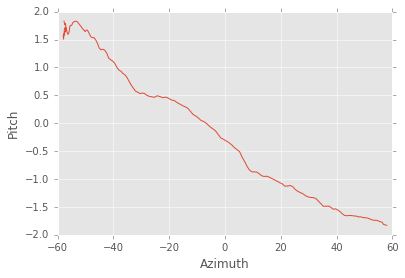

In [8]:
plt.plot(x,y)
plt.xlabel('Azimuth')
plt.ylabel('Pitch')

# Features

In [137]:
updata = pd.read_csv('scfeatures/up.csv', sep ='\t')
leftdata = pd.read_csv('scfeatures/left.csv', sep ='\t')
rightdata = pd.read_csv('scfeatures/right.csv', sep ='\t')
downdata = pd.read_csv('scfeatures/down.csv', sep ='\t')
circledata = pd.read_csv('scfeatures/circle.csv', sep ='\t')
garbagedata = pd.read_csv('scfeatures/garbage.csv', sep ='\t')

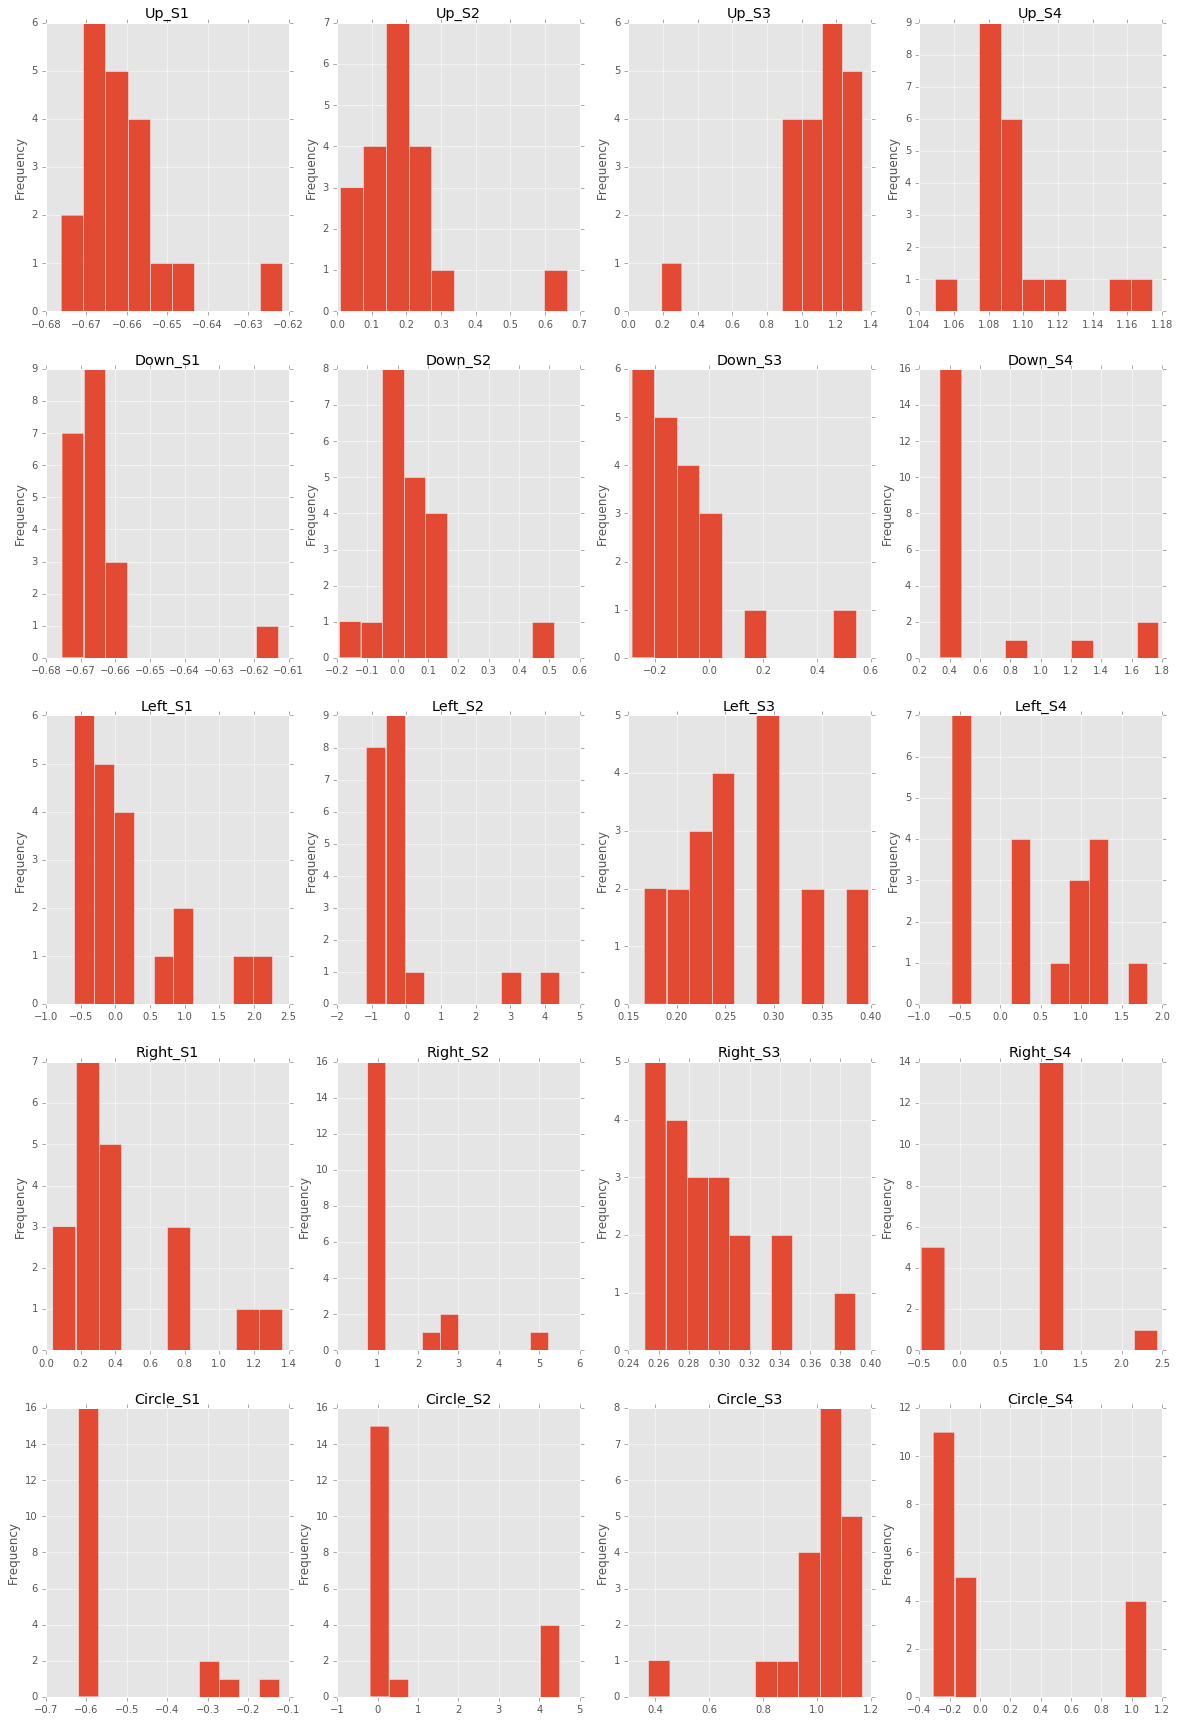

In [71]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))

updata['S1'].plot(kind='hist', ax=axes[0,0], title = 'Up_S1')
updata['S2'].plot(kind='hist', ax=axes[0,1], title = 'Up_S2')
updata['S3'].plot(kind='hist', ax=axes[0,2], title = 'Up_S3')
updata['S4'].plot(kind='hist', ax=axes[0,3], title = 'Up_S4')

downdata['S1'].plot(kind='hist', ax=axes[1,0], title = 'Down_S1')
downdata['S2'].plot(kind='hist', ax=axes[1,1], title = 'Down_S2')
downdata['S3'].plot(kind='hist', ax=axes[1,2], title = 'Down_S3')
downdata['S4'].plot(kind='hist', ax=axes[1,3], title = 'Down_S4')

leftdata['S1'].plot(kind='hist', ax=axes[2,0], title = 'Left_S1')
leftdata['S2'].plot(kind='hist', ax=axes[2,1], title = 'Left_S2')
leftdata['S3'].plot(kind='hist', ax=axes[2,2], title = 'Left_S3')
leftdata['S4'].plot(kind='hist', ax=axes[2,3], title = 'Left_S4')

rightdata['S1'].plot(kind='hist', ax=axes[3,0], title = 'Right_S1')
rightdata['S2'].plot(kind='hist', ax=axes[3,1], title = 'Right_S2')
rightdata['S3'].plot(kind='hist', ax=axes[3,2], title = 'Right_S3')
rightdata['S4'].plot(kind='hist', ax=axes[3,3], title = 'Right_S4')

circledata['S1'].plot(kind='hist', ax=axes[4,0], title = 'Circle_S1')
circledata['S2'].plot(kind='hist', ax=axes[4,1], title = 'Circle_S2')
circledata['S3'].plot(kind='hist', ax=axes[4,2], title = 'Circle_S3')
circledata['S4'].plot(kind='hist', ax=axes[4,3], title = 'Circle_S4')


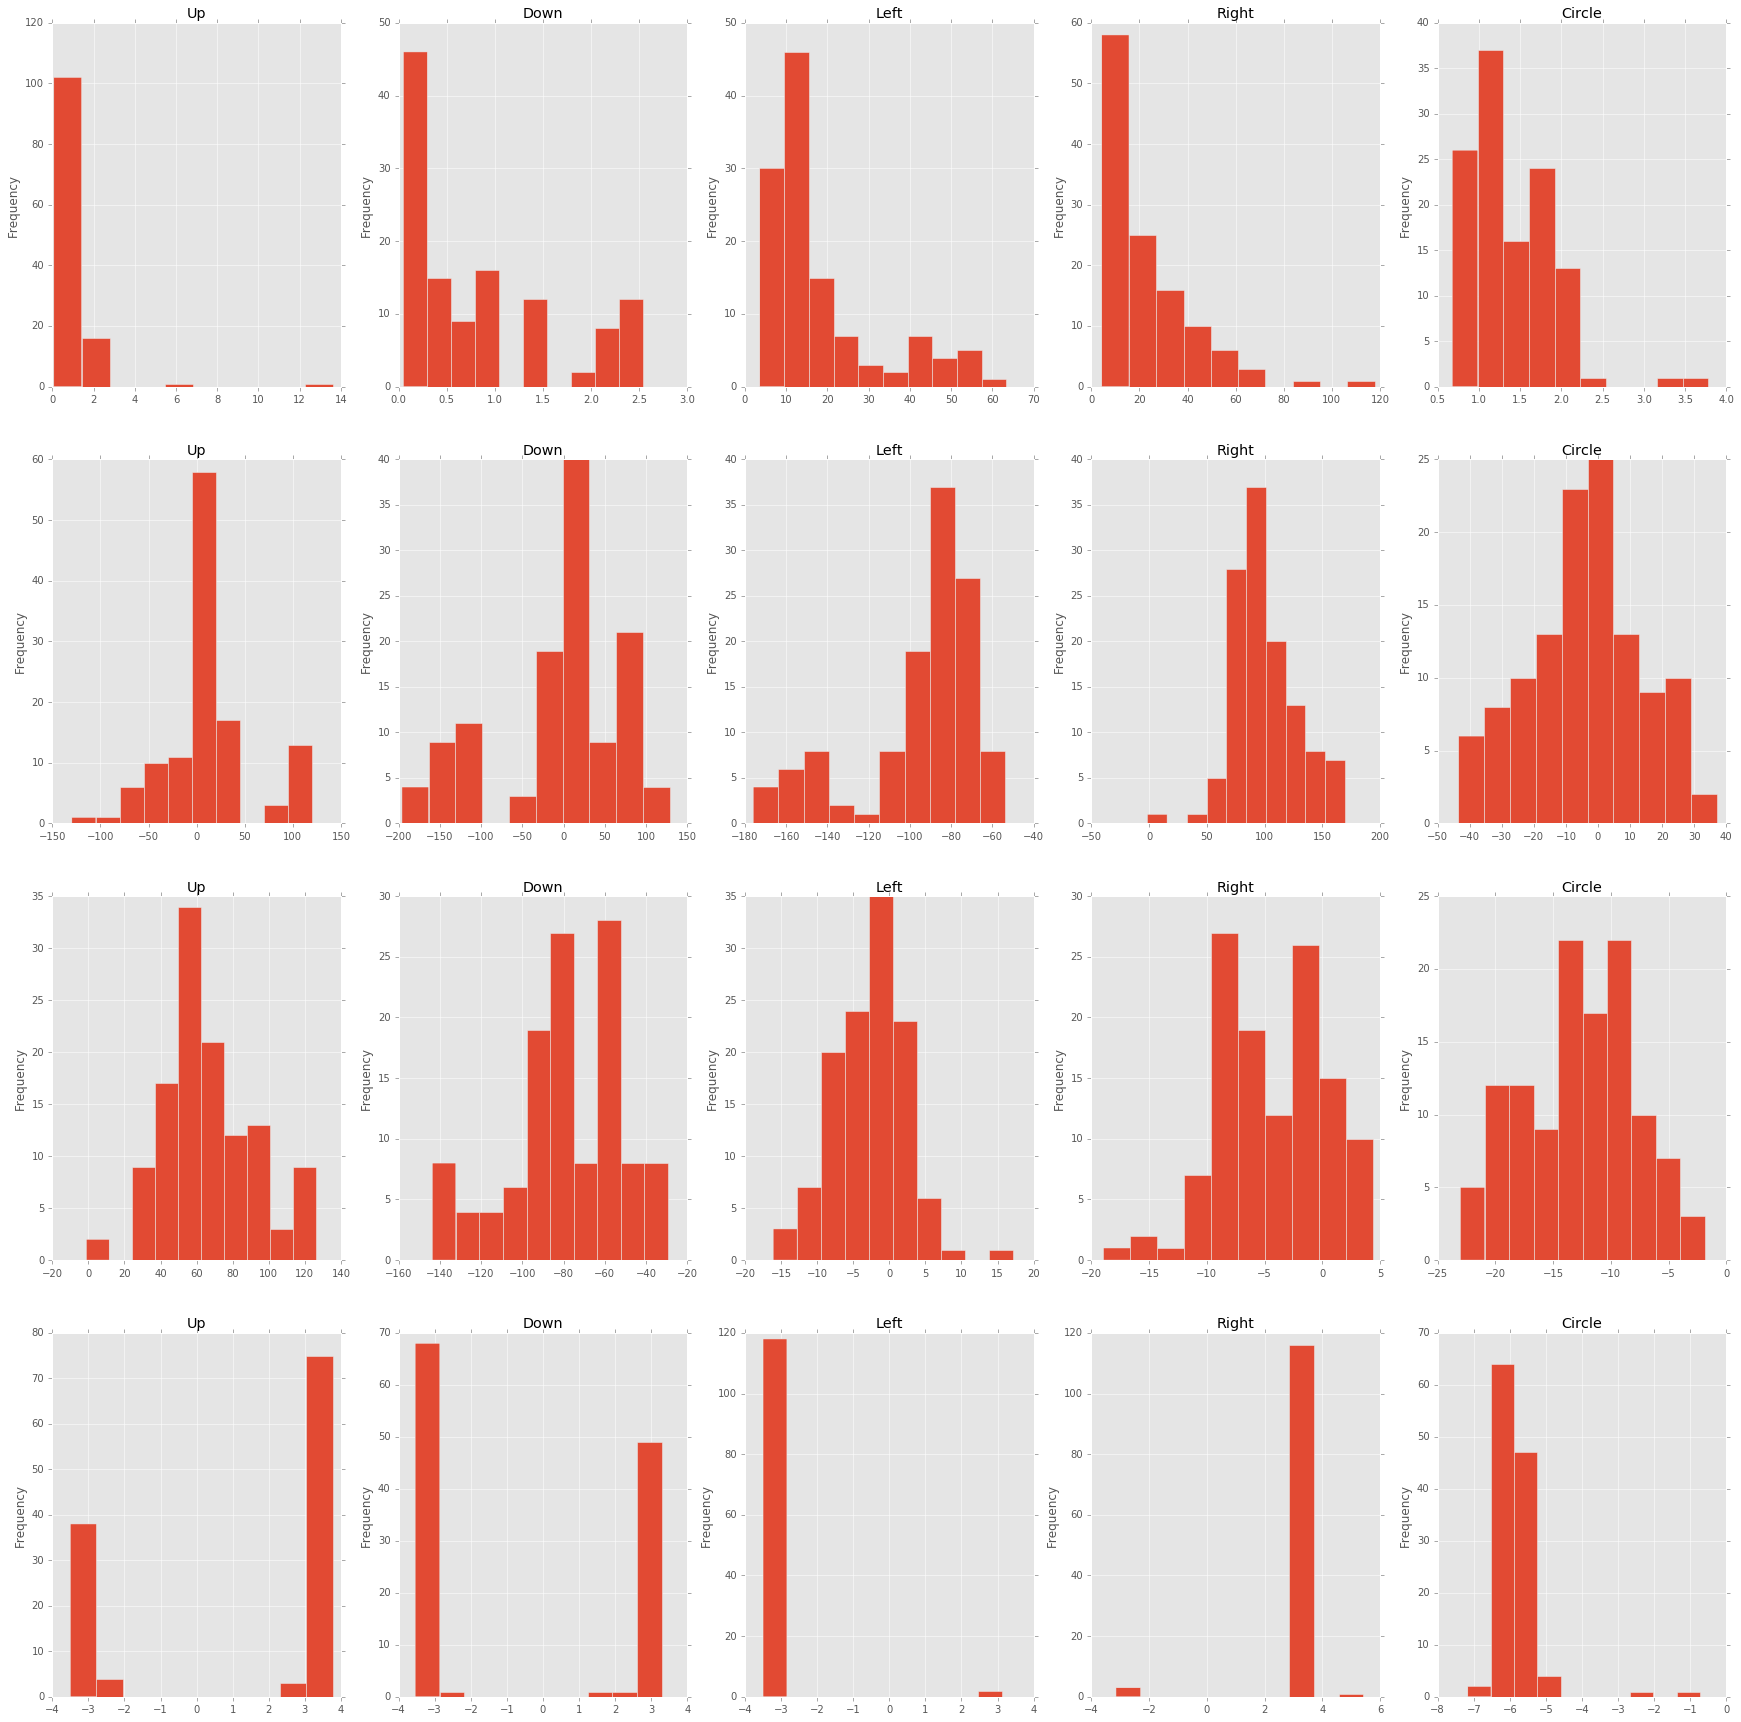

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30, 30))

updata['S1'].plot(kind='hist', ax=axes[0,0], title = 'Up')
downdata['S1'].plot(kind='hist', ax=axes[0,1], title = 'Down')
leftdata['S1'].plot(kind='hist', ax=axes[0,2], title = 'Left')
rightdata['S1'].plot(kind='hist', ax=axes[0,3], title = 'Right')
circledata['S1'].plot(kind='hist', ax=axes[0,4], title = 'Circle')


updata['S2'].plot(kind='hist', ax=axes[1,0], title = 'Up')
downdata['S2'].plot(kind='hist', ax=axes[1,1], title = 'Down')
leftdata['S2'].plot(kind='hist', ax=axes[1,2], title = 'Left')
rightdata['S2'].plot(kind='hist', ax=axes[1,3], title = 'Right')
circledata['S2'].plot(kind='hist', ax=axes[1,4], title = 'Circle')


updata['S3'].plot(kind='hist', ax=axes[2,0], title = 'Up')
downdata['S3'].plot(kind='hist', ax=axes[2,1], title = 'Down')
leftdata['S3'].plot(kind='hist', ax=axes[2,2], title = 'Left')
rightdata['S3'].plot(kind='hist', ax=axes[2,3], title = 'Right')
circledata['S3'].plot(kind='hist', ax=axes[2,4], title = 'Circle')


updata['S4'].plot(kind='hist', ax=axes[3,0], title = 'Up')
downdata['S4'].plot(kind='hist', ax=axes[3,1], title = 'Down')
leftdata['S4'].plot(kind='hist', ax=axes[3,2], title = 'Left')
rightdata['S4'].plot(kind='hist', ax=axes[3,3], title = 'Right')
circledata['S4'].plot(kind='hist', ax=axes[3,4], title = 'Circle')


# Datafunc

In [138]:
def datafunc(truedata, data1, data2, data3, data4, data5):
    train_true = truedata.copy()
    train_true['result'] = pd.Series([1 for x in range(len(train_true.index))])

    train_false = downdata.copy()
    train_false = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)
    train_false['result'] = pd.Series([-1 for x in range(len(train_false.index))])

    train = pd.concat([train_true, train_false], ignore_index=True)
    train = train.reindex(np.random.permutation(train.index))
    train = train.reset_index()

    train_data = np.ndarray([len(train), 5])
    train_values = np.ndarray(len(train))
    
    for i in range (0,len(train_data)):
                train_data[i] = [train.S1[i], train.S2[i], train.S3[i], train.S4[i], train.S5[i]]
                train_values[i] = train.result[i]
    return train_data, train_values

# Up

In [139]:
train_up_true = updata.copy()
train_up_true['result'] = pd.Series([1 for x in range(len(train_up_true.index))])
train_up_true.head()

Name        S1        S2        S3        S4        S5  result
0     1 -0.601956 -0.122680  1.179804  0.922541 -0.602009       1
1     2 -0.607276 -0.046265  0.997078 -0.575392 -0.817450       1
2     3 -0.605978  0.044464  0.803566  0.922541 -0.970982       1
3     4 -0.596371  0.139035  1.078591  0.922541 -0.736970       1
4     5 -0.601994  0.105808  1.210028  0.923317 -0.742541       1

In [140]:
train_up_false = pd.concat([leftdata, rightdata, circledata, downdata, garbagedata], ignore_index=True)
train_up_false['result'] = pd.Series([-1 for x in range(len(train_up_false.index))])

In [141]:
train_up = pd.concat([train_up_true, train_up_false], ignore_index=True)
train_up = train_up.reindex(np.random.permutation(train_up.index))
train_up = train_up.reset_index()
len(train_up)

240

In [142]:
train_up_data = np.ndarray([len(train_up), 5])
train_up_values = np.ndarray(len(train_up))
type(train_up_data)
for i in range (0,len(train_up)):
                train_up_data[i] = [train_up.S1[i], train_up.S2[i], train_up.S3[i], train_up.S4[i], train_up.S5[i]]
                train_up_values[i] = train_up.result[i]

In [143]:
from sklearn import cross_validation, datasets, linear_model, metrics
SDG_classifier = linear_model.SGDClassifier(random_state = 1, n_iter=100000)
SDG_classifier.fit(train_up_data, train_up_values)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=100000, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False)

In [144]:
metrics.accuracy_score(train_up_values, SDG_classifier.predict(train_up_data))

0.99583333333333335

In [145]:
# Coeff
print SDG_classifier.intercept_, SDG_classifier.coef_

[-6.31550126] [[-0.93581115  0.18316175  4.73362819  0.00608417 -2.49706813]]


# Down

In [146]:
train_data, train_values = datafunc(downdata, leftdata, rightdata, updata, circledata, garbagedata)

In [147]:
SDG_classifier = linear_model.SGDClassifier(n_iter=100000)
SDG_classifier.fit(train_data, train_values)
SDG_classifier.coef_

array([[-0.48520092,  1.57693408, -5.08138462, -0.20861506, -1.69745363]])

In [148]:
metrics.accuracy_score(train_values, SDG_classifier.predict(train_data))

1.0

In [149]:
# Coeff
print SDG_classifier.intercept_, SDG_classifier.coef_

[-6.01328278] [[-0.48520092  1.57693408 -5.08138462 -0.20861506 -1.69745363]]


# Left

In [150]:
train_data, train_values = datafunc(leftdata, downdata, rightdata, updata, circledata, garbagedata)

In [151]:
SDG_classifier = linear_model.SGDClassifier(n_iter=100000)
SDG_classifier.fit(train_data, train_values)
SDG_classifier.coef_

array([[  2.54197959, -10.06482263,  -1.16189523,   5.1104764 ,
         -2.00545948]])

In [152]:
metrics.accuracy_score(train_values, SDG_classifier.predict(train_data))

0.9916666666666667

In [153]:
# Coeff
print SDG_classifier.intercept_, SDG_classifier.coef_

[-9.08917348] [[  2.54197959 -10.06482263  -1.16189523   5.1104764   -2.00545948]]


# Right

In [154]:
train_data, train_values = datafunc(rightdata, downdata, leftdata, updata, circledata, garbagedata)

In [155]:
SDG_classifier = linear_model.SGDClassifier(n_iter=100000)
SDG_classifier.fit(train_data, train_values)
SDG_classifier.coef_

array([[-0.30086207,  5.77513159, -1.77683349,  3.3810688 , -4.05052701]])

In [156]:
metrics.accuracy_score(train_values, SDG_classifier.predict(train_data))

0.99583333333333335

In [157]:
# Coeff
print SDG_classifier.intercept_, SDG_classifier.coef_

[-9.08112834] [[-0.30086207  5.77513159 -1.77683349  3.3810688  -4.05052701]]


# Circle

In [158]:
train_data, train_values = datafunc(circledata, downdata, leftdata, updata, rightdata, garbagedata)

In [159]:
SDG_classifier = linear_model.SGDClassifier(random_state = 1, n_iter=100000)
SDG_classifier.fit(train_data, train_values)
SDG_classifier.coef_

array([[-2.5457392 ,  0.59457736, -0.13317081, -3.50919669,  0.31056265]])

In [160]:
metrics.accuracy_score(train_values, SDG_classifier.predict(train_data))

0.99583333333333335

In [161]:
# Coeff
print SDG_classifier.intercept_, SDG_classifier.coef_

[-4.59719245] [[-2.5457392   0.59457736 -0.13317081 -3.50919669  0.31056265]]


In [162]:
print SDG_classifier.coef_[0][3]

-3.50919668803


# Check

In [46]:
for i in range (0, len(train_values)):
    print 'Data', i
    print (SDG_classifier.intercept_ + sum(SDG_classifier.coef_[0] * train_data[i]))
    print 'Value'
    print SDG_classifier.decision_function(train_data[i])
    print train_values[i]

Data 0
[-8.48365458]
Value
[-8.48365458]
-1.0
Data 1
[-8.53816958]
Value
[-8.53816958]
-1.0
Data 2
[ 1.33125433]
Value
[ 1.33125433]
1.0
Data 3
[-7.19819383]
Value
[-7.19819383]
-1.0
Data 4
[-6.85639368]
Value
[-6.85639368]
-1.0
Data 5
[ 1.58650441]
Value
[ 1.58650441]
1.0
Data 6
[ 1.57317683]
Value
[ 1.57317683]
1.0
Data 7
[-8.0577234]
Value
[-8.0577234]
-1.0
Data 8
[-1.78538147]
Value
[-1.78538147]
-1.0
Data 9
[-7.64702381]
Value
[-7.64702381]
-1.0
Data 10
[-1.18369598]
Value
[-1.18369598]
-1.0
Data 11
[-1.06597095]
Value
[-1.06597095]
-1.0
Data 12
[-1.21622785]
Value
[-1.21622785]
-1.0
Data 13
[-1.27710011]
Value
[-1.27710011]
-1.0
Data 14
[-7.42148653]
Value
[-7.42148653]
-1.0
Data 15
[ 1.46228605]
Value
[ 1.46228605]
1.0
Data 16
[-1.21487512]
Value
[-1.21487512]
-1.0
Data 17
[-1.01074006]
Value
[-1.01074006]
-1.0
Data 18
[-1.28233666]
Value
[-1.28233666]
-1.0
Data 19
[-1.10951614]
Value
[-1.10951614]
-1.0
Data 20
[-7.65481291]
Value
[-7.65481291]
-1.0
Data 21
[-8.31237965]
Value
[

C:\Users\Maxim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Maxim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Maxim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

[ 1.77110938]
1.0
Data 228
[-1.13617789]
Value
[-1.13617789]
-1.0
Data 229
[-1.21322733]
Value
[-1.21322733]
-1.0
Data 230
[-1.17871155]
Value
[-1.17871155]
-1.0
Data 231
[ 1.41627125]
Value
[ 1.41627125]
1.0
Data 232
[-8.48202226]
Value
[-8.48202226]
-1.0
Data 233
[-7.32412177]
Value
[-7.32412177]
-1.0
Data 234
[-1.14283104]
Value
[-1.14283104]
-1.0
Data 235
[-7.14182694]
Value
[-7.14182694]
-1.0
Data 236
[-6.84437037]
Value
[-6.84437037]
-1.0
Data 237
[-7.28519559]
Value
[-7.28519559]
-1.0
Data 238
[-1.09237468]
Value
[-1.09237468]
-1.0
Data 239
[-8.64060623]
Value
[-8.64060623]
-1.0
Data 240
[-8.07862837]
Value
[-8.07862837]
-1.0
Data 241
[-7.72261996]
Value
[-7.72261996]
-1.0
Data 242
[-8.44036648]
Value
[-8.44036648]
-1.0
Data 243
[-1.13738987]
Value
[-1.13738987]
-1.0
Data 244
[-7.22344696]
Value
[-7.22344696]
-1.0
Data 245
[ 1.51512151]
Value
[ 1.51512151]
1.0
Data 246
[-1.09113128]
Value
[-1.09113128]
-1.0
Data 247
[-1.03121141]
Value
[-1.03121141]
-1.0
Data 248
[-1.41099332]
V

C:\Users\Maxim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Maxim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Maxim\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

In [43]:
SDG_classifier.coef_[0][0]

-0.41368518662157239

In [44]:
sum(SDG_classifier.coef_[0] * train_data[0])

-5.2812748616430021

# Time

In [9]:
uptime = pd.read_csv('time/train_data/up.csv', sep ='\t')
lefttime = pd.read_csv('time/train_data/left.csv', sep ='\t')
righttime = pd.read_csv('time/train_data/right.csv', sep ='\t')
downtime = pd.read_csv('time/train_data/down.csv', sep ='\t')
circletime = pd.read_csv('time/train_data/circle.csv', sep ='\t')

In [16]:
uptime.head()

Name  executionTime(ms)  movementTime(ms)
0  13_112030_Raw.txt                  2         3999.0000
1  13_112038_Raw.txt                  4         4910.0005
2  13_112046_Raw.txt                  4         6038.0000
3  13_112056_Raw.txt                  2         2963.0000
4  13_112103_Raw.txt                  3         3182.0000

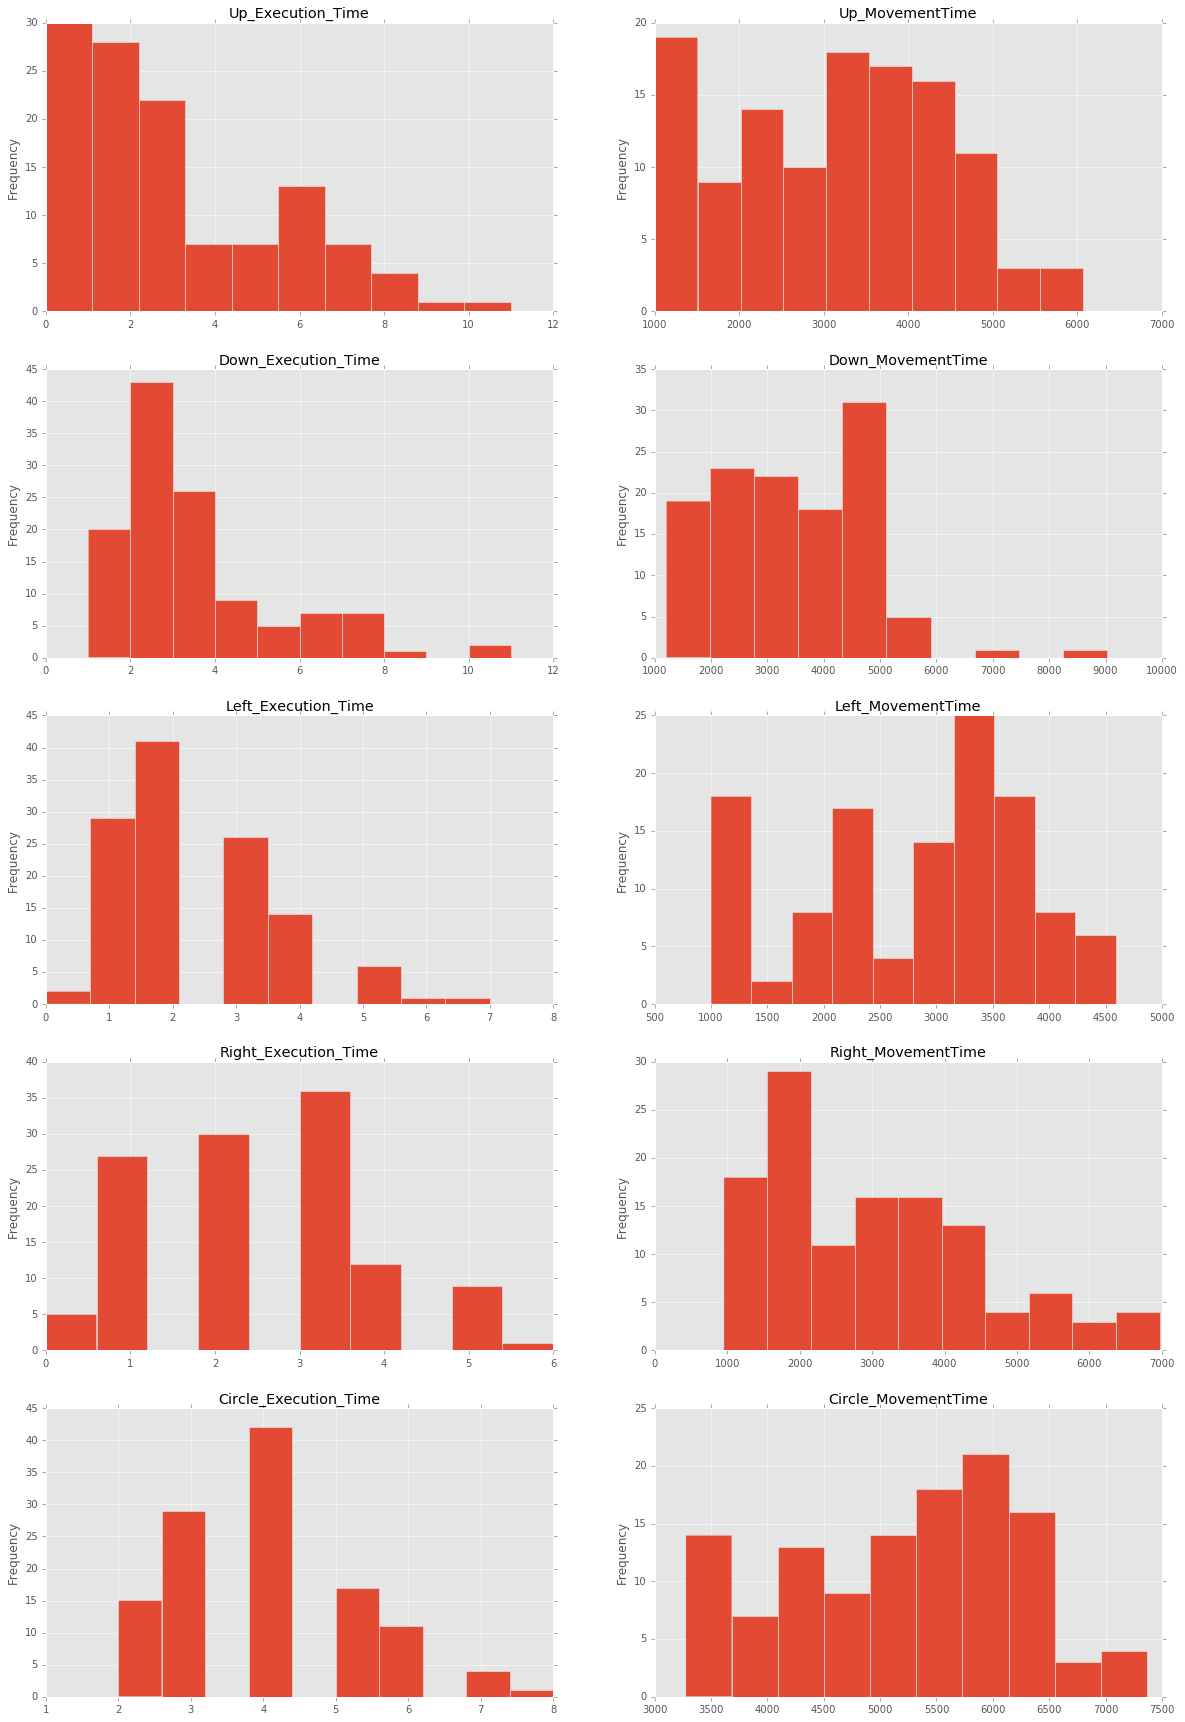

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

uptime['executionTime(ms)'].plot(kind='hist', ax=axes[0,0], title = 'Up_Execution_Time')
uptime['movementTime(ms)'].plot(kind='hist', ax=axes[0,1], title = 'Up_MovementTime')

downtime['executionTime(ms)'].plot(kind='hist', ax=axes[1,0], title = 'Down_Execution_Time')
downtime['movementTime(ms)'].plot(kind='hist', ax=axes[1,1], title = 'Down_MovementTime')

lefttime['executionTime(ms)'].plot(kind='hist', ax=axes[2,0], title = 'Left_Execution_Time')
lefttime['movementTime(ms)'].plot(kind='hist', ax=axes[2,1], title = 'Left_MovementTime')

righttime['executionTime(ms)'].plot(kind='hist', ax=axes[3,0], title = 'Right_Execution_Time')
righttime['movementTime(ms)'].plot(kind='hist', ax=axes[3,1], title = 'Right_MovementTime')

circletime['executionTime(ms)'].plot(kind='hist', ax=axes[4,0], title = 'Circle_Execution_Time')
circletime['movementTime(ms)'].plot(kind='hist', ax=axes[4,1], title = 'Circle_MovementTime')

In [47]:
def standardDev(mean, array):
    summ = 0.0
    for i in range(0,array.size -1):
        summ = summ + (array[i] - mean)*(array[i] - mean)
    summ = summ/array.size
    summ = np.sqrt(summ)
    return summ
    

In [65]:
def getValues(dataframe):
    print "Execution time mean is " + str(dataframe['executionTime(ms)'].mean()) + "\n"
    print 'Standard deviation of execution time is ' + str(standardDev(dataframe['executionTime(ms)'].mean(), dataframe['executionTime(ms)'])) + "\n"
    
    print "Movement time mean is " + str(dataframe['movementTime(ms)'].mean()) + "\n"
    print "Standard deviation of movement time is " + str(standardDev(dataframe['movementTime(ms)'].mean(), dataframe['movementTime(ms)'])) + "\n"

## Up

In [66]:
getValues(uptime)

Execution time mean is 3.275

Standard deviation of execution time is 2.24777552075

Movement time mean is 3138.19167667

Standard deviation of movement time is 1274.6733767



## Down

In [67]:
getValues(downtime)

Execution time mean is 3.04166666667

Standard deviation of execution time is 1.9592159654

Movement time mean is 3423.03334583

Standard deviation of movement time is 1337.19609249



## Left

In [68]:
getValues(lefttime)

Execution time mean is 2.4

Standard deviation of execution time is 1.26767503722

Movement time mean is 2832.70001167

Standard deviation of movement time is 959.304691729



## Right

In [69]:
getValues(righttime)

Execution time mean is 2.45

Standard deviation of execution time is 1.29614010302

Movement time mean is 3025.183323

Standard deviation of movement time is 1472.94224391



## Circle

In [71]:
getValues(circletime)

Execution time mean is 3.96638655462

Standard deviation of execution time is 1.30243603806

Movement time mean is 5226.56299496

Standard deviation of movement time is 1014.0484799

